### Library Imports

Import necessary libraries: pandas, BERTopic, matplotlib, hdbscan, and WordCloud.
Install the required libraries if they are not already installed.

In [ ]:
!pip install bertopic

In [ ]:
!pip install hdbscan

In [ ]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt
import hdbscan
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Data Loading

Load the FIFA World Cup 2022 Tweets dataset from Google Drive.

Sample 10,000 tweets from the dataset for the analysis.

Extract the 'Tweet' column from the dataset and store it in the 'tweets' variable.

In [ ]:
# Load the dataset
sample_data = pd.read_csv('/content/drive/MyDrive/fifa_world_cup_2022_tweets.csv', index_col=0)

data = sample_data.sample(n=10000, random_state=42)

# Extract the tweets column for modeling
tweets = data['Tweet'].tolist()

# Check the first few tweets
print(tweets[:5])


['Ecuador players after losing 1-0 against Qatar tonight. #FIFAWorldCup #WorldcupQatar2022 #WorldCup2022 https://t.co/hOijAm4fWX', 'Morgan Freeman too old damn can’t believe #WorldCup2022', "So, I guess we have a #WorldCup2022 opener ahead. As governing bodies, the FIA and FIFA are pretty similar.\n\nAnd the Cup is tainted from way before it's begin. This will be my first and also my last one about the event.", 'So are we going to hear @GaryLineker and other pundits in 2026 talk about the USA regarding their WAR CRIMES and controversies? \n\n#Qatar2022 #Qatar #WorldCup2022 #WorldCup', 'Should have had a hattrick already. #QATECU #WorldCup2022']


### Pre-Processing

Define a function 'clean_text' to preprocess the tweet text.

Remove URLs, hashtags, mentions, numbers, and emoticons from the tweet text.

Apply the cleaning function to the 'Tweet' column and store the cleaned text in the 'Cleaned_Tweet' column.

In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove any remaining non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\ssimilar\s*\n*\s*and', '', text)

    # To remove emotions
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))

    text = text.strip()
    return text

# Apply cleaning to the Tweet column
data['Cleaned_Tweet'] = data['Tweet'].apply(clean_text)

tweets = data['Cleaned_Tweet'].tolist()
print(tweets[:5])

['ecuador players after losing against qatar tonight', 'morgan freeman too old damn cant believe', 'so i guess we have a opener ahead as governing bodies the fia and fifa are pretty similar and the cup is tainted from way before its begin this will be my first and also my last one about the event', 'so are we going to hear and other pundits in talk about the usa regarding their war crimes and controversies', 'should have had a hattrick already']


### Topic Modeling

Initialise a BERTopic model with HDBSCAN clustering.

Fit the topic model to the cleaned tweet data and obtain the topics and topic probabilities.

In [ ]:
# Define HDBSCAN model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Initialize BERTopic with HDBSCAN
topic_model = BERTopic(language="english",
                       calculate_probabilities=True,
                       verbose=True,
                       hdbscan_model=hdbscan_model)

topics, probs = topic_model.fit_transform(tweets)


2024-11-15 15:38:19,381 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2024-11-15 15:38:37,574 - BERTopic - Embedding - Completed ✓
2024-11-15 15:38:37,575 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-15 15:39:18,016 - BERTopic - Dimensionality - Completed ✓
2024-11-15 15:39:18,017 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-15 15:39:33,065 - BERTopic - Cluster - Completed ✓
2024-11-15 15:39:33,075 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-15 15:39:33,448 - BERTopic - Representation - Completed ✓


Print the topic information to inspect the generated topics.

Retrieve the words associated with a specific topic (e.g., topic 0).

In [ ]:
# Get topic information and display
topics_info = topic_model.get_topic_info()
print(topics_info)

# To see words associated with a specific topic (e.g., topic 0)
print(topic_model.get_topic(0))  # Replace 0 with any topic ID to explore others

# The BERTopic model ignores topic -1 as it contains stopwords (the, to, in)

     Topic  Count                                        Name  \
0       -1   3324                            -1_the_to_in_and   
1        0    216                0_valencia_enner_goal_scored   
2        1    174              1_var_decision_already_minutes   
3        2    142                     2_bet_bets_betting_odds   
4        3    135                 3_ecuador_hoping_come_vamos   
..     ...    ...                                         ...   
181    180     11  180_amazing_ceremony_accordingly_decorates   
182    181     11                 181_rules_rule_new_afterall   
183    182     11       182_portugal_portugalsenegal_por_whom   
184    183     11                    183_begins_so_bribing_it   
185    184     10        184_ronaldo_position_interview_lovro   

                                        Representation  \
0     [the, to, in, and, qatar, on, this, of, is, for]   
1    [valencia, enner, goal, scored, brace, goals, ...   
2    [var, decision, already, minutes, ruins,

### Topic Coherence Evaluation

Using the Gensim library to evaluate the topic coherence.

In [ ]:
# import library from gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Preprocess documents
cleaned_docs = topic_model._preprocess_text(tweets)

# Extract vectorizer from BERTopic
vectorizer = topic_model.vectorizer_model

# Extract features for Topic Coherence evaluation
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = topic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in topic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)][:10]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

Print the coherence score to assess the quality of the topic model.

In [ ]:
print(coherence)

0.5762981302111634


### Visualisation

Generate a word cloud visualization for a specific topic (e.g., topic 0, because it has most word count).

In [ ]:
# Install WordCloud library (if haven't already)
!pip install wordcloud

# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

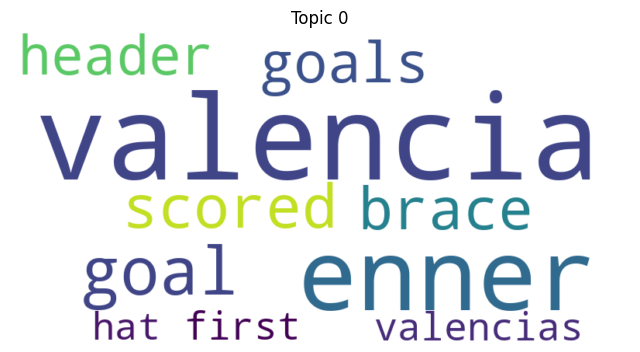

In [ ]:
# Get words associated with Topic 0
topic_id = 0
topic_words_probs = topic_model.get_topic(topic_id)  # Get list of (word, probability) tuples

# Create a word frequency dictionary
word_freq = {word: prob for word, prob in topic_words_probs}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Topic {topic_id}")
plt.show()

In [ ]:
topic_model.visualize_topics()

Each circle or "bubble" represents a distinct topic, and the size of the bubble indicates the relative importance or prevalence of that topic.
The closer the bubbles are to each other, the more similar the underlying topics are in terms of their semantic content.

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

The vertical axis represents the distance or dissimilarity between clusters, while the horizontal axis lists the individual data points or topics.

Topics that are closer together on the horizontal axis are more related to each other.

For example, the topics "10_ecuador_gatar_them" and "14_doha_qatar_come" appear to be quite similar and are clustered together at a relatively low distance.

The height of the branches indicates the level of dissimilarity between the merged clusters. Taller branches represent greater differences between the underlying topics.

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

This image presents the topic word scores for several topics identified through the topic modeling process.
Each bar chart shows the top words associated with a specific topic, along with their corresponding scores.

For example, in Topic 0, the words "valencia", "enner", "goal", and "scored" have the highest scores, suggesting they are the most significant terms in defining this topic.

Similarly, Topic 1 appears to be related to "var", "decision", "already", and "minutes", while Topic 2 focuses on "bet", "bets", "betting", and "odds".

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

The Similarity Matrix visualizes the relationships and similarities between the different topics identified in the dataset. The matrix shows the pairwise similarity scores between topics, with values ranging from 0 to 1.

Darker cells indicate a higher degree of similarity between the corresponding topics.
